# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [93]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [94]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [95]:
heroes_df.drop(columns='Unnamed: 0',inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [96]:
# Noticed varied capitalization in column titles, making all lowercase:
heroes_df.columns = [name.lower() for name in heroes_df.columns]
heroes_df.head()

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [97]:
# Doing the same for powers_df
powers_df.columns = [name.lower() for name in powers_df.columns]

In [98]:
powers_df.head()

,hero_names,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [99]:
print(len(heroes_df), len(powers_df))

734 667


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [100]:
#Looking at heroes_df first
heroes_df.describe()

,height,weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [101]:
#Looks like height and weight columns have -99 for placeholder values, and a lot of them
heroes_df.height.value_counts().head()

-99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
Name: height, dtype: int64

In [102]:
heroes_df.height.nunique()

54

In [103]:
heroes_df.height.unique()

array([203. , 191. , 185. , -99. , 193. , 173. , 178. , 188. , 180. ,
       244. , 257. , 183. , 165. , 163. , 211. ,  61. , 229. , 213. ,
       175. , 198. , 168. , 170. , 201. , 218. ,  30.5, 196. , 157. ,
       226. , 267. , 122. , 975. , 142. , 876. ,  62.5, 108. , 701. ,
       259. ,  79. , 155. ,  71. , 287. , 234. ,  64. , 366. , 206. ,
       305. , 297. , 137. , 279. ,  15.2, 140. , 160. , 304.8,  66. ])

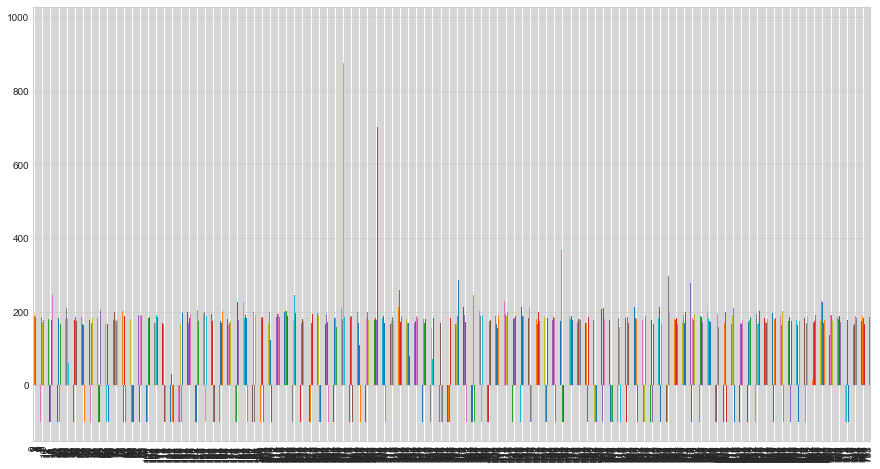

In [104]:
heroes_df.height.plot(kind='bar',figsize=(15,8))

In [105]:
heroes_df2 = heroes_df.copy()
heroes_df2['height_cat'] = pd.cut(heroes_df2.height, bins=[-101,-99,80,259,438,980])

In [106]:
heroes_df2.height_cat.value_counts()

(80, 259]      495
(-101, -99]    217
(259, 438]      10
(-99, 80]        9
(438, 980]       3
Name: height_cat, dtype: int64

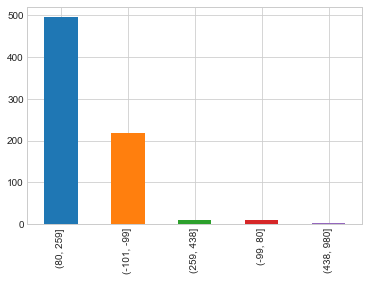

In [107]:
heroes_df2.height_cat.value_counts().plot(kind='bar')

In [108]:
heroes_df2.head()

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight,height_cat
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,"(80, 259]"
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,"(80, 259]"
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,"(80, 259]"
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,"(80, 259]"
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,"(-101, -99]"


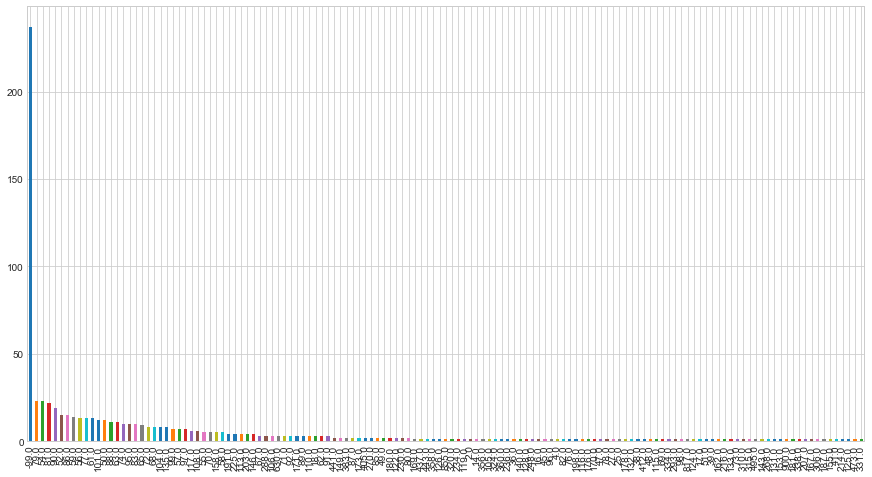

In [109]:
heroes_df2.weight.value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(15,8))

In [110]:
print("Ratio of null values in weight column",len(heroes_df2[heroes_df2['weight']==-99])/heroes_df2.weight.value_counts().sum())

Ratio of null values in weight column 0.3237704918032787


In [111]:
heroes_df2.weight.value_counts().sort_index()

-99.0     237
 2.0        1
 4.0        1
 14.0       1
 16.0       1
 17.0       1
 18.0       3
 25.0       1
 27.0       1
 36.0       1
 38.0       1
 39.0       1
 41.0       1
 45.0       1
 47.0       1
 48.0       1
 49.0       2
 50.0      12
 51.0       1
 52.0      15
 54.0      23
 55.0       5
 56.0      13
 57.0       7
 58.0       5
 59.0      14
 61.0      13
 62.0       3
 63.0      11
 65.0       9
         ... 
 234.0      1
 236.0      1
 248.0      1
 268.0      1
 270.0      2
 288.0      3
 293.0      1
 306.0      1
 310.0      1
 315.0      1
 320.0      1
 324.0      1
 331.0      1
 334.0      1
 338.0      1
 356.0      1
 358.0      1
 360.0      1
 383.0      2
 405.0      2
 412.0      1
 437.0      1
 441.0      2
 443.0      1
 473.0      1
 495.0      1
 630.0      3
 817.0      1
 855.0      1
 900.0      1
Name: weight, Length: 135, dtype: int64

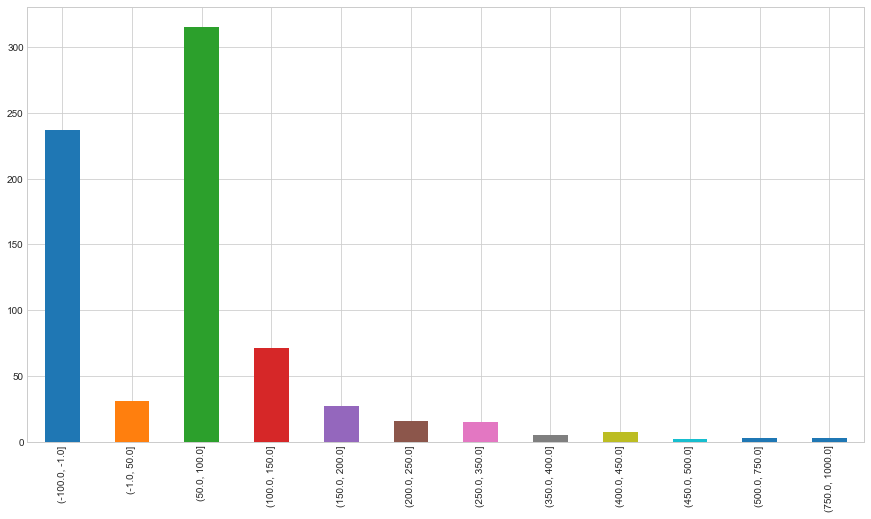

In [112]:
# Going to turn the weight data into categorical data to handle null values without removing
heroes_df2['weight_cat'] = pd.cut(heroes_df2.weight,bins=[-100.0,-1,50,100,150,200,250,350,400,450,500,750,1000])
heroes_df2.weight_cat.value_counts().sort_index().plot(kind='bar',figsize=(15,8))

In [113]:
heroes_df2.head()

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight,height_cat,weight_cat
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,"(80, 259]","(400.0, 450.0]"
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,"(80, 259]","(50.0, 100.0]"
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,"(80, 259]","(50.0, 100.0]"
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,"(80, 259]","(400.0, 450.0]"
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,"(-101, -99]","(-100.0, -1.0]"


In [114]:
powers_df.describe().transpose().unique.value_counts()

2      167
667      1
Name: unique, dtype: int64

In [115]:
#Looks like the powers_df contains a lot of columns with all boolean values other than the name column
powers_df.describe()

,hero_names,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Doomsday,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________




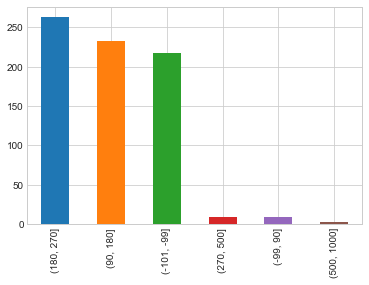

In [116]:
# First, the weights have -99 as placeholder values for nulls, and there are too many to delete,
# So I will use pd.cut() to turn weights into categorical bin data (better bins than before)
heroes_df2.height_cat = pd.cut(heroes_df.height, bins=[-101,-99,90,180,270,500,1000])
heroes_df2.height_cat.value_counts().plot(kind='bar')

In [117]:
#The race column has null values denoted by '-', I don't see a problem leaving these, 
#could replace label but not drop because there are too many
print("Ratio of null values in race:",len(heroes_df2[heroes_df2['race']=='-'])/heroes_df2.race.count())
heroes_df2.race.value_counts()

Ratio of null values in race: 0.4141689373297003


-                     304
Human                 208
Mutant                 63
God / Eternal          14
Cyborg                 11
Human / Radiation      11
Android                 9
Symbiote                9
Alien                   7
Kryptonian              7
Demon                   6
Atlantean               5
Asgardian               5
Alpha                   5
Inhuman                 4
Animal                  4
Cosmic Entity           4
Human / Altered         3
New God                 3
Amazon                  2
Demi-God                2
Vampire                 2
Frost Giant             2
Human / Cosmic          2
Metahuman               2
Saiyan                  2
Eternal                 2
Human-Kree              2
Zen-Whoberian           1
Flora Colossus          1
                     ... 
Clone                   1
Bizarro                 1
Gungan                  1
Ungaran                 1
Mutant / Clone          1
Yoda's species          1
Kakarantharaian         1
Maiar       

In [118]:
#Not doing these for now
#heroes_df2.race.replace('-','Unknown',inplace=True)
#heroes_df2.race.value_counts().head()

In [119]:
#Looks like there are some typos in the hair color column that can be fixed, as well as
#replacing '-' with 'Unknown' if we wanted
heroes_df2['hair color'].value_counts()

-                   172
Black               158
Blond                99
Brown                86
No Hair              75
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Grey                  5
Purple                5
Silver                4
Brown / White         4
Blue                  3
black                 3
blond                 3
Yellow                2
Orange                2
Brown / Black         1
Orange / White        1
Gold                  1
Pink                  1
Red / Grey            1
Red / Orange          1
Magenta               1
Black / Blue          1
Red / White           1
Indigo                1
Brownn                1
Name: hair color, dtype: int64

In [120]:
heroes_df2['hair color'].replace(['black','blond','Brownn'],['Black','Blond','Brown'], inplace=True)
heroes_df2['hair color'].value_counts()

-                   172
Black               161
Blond               102
Brown                87
No Hair              75
Red                  51
White                23
Auburn               13
Green                 8
Strawberry Blond      7
Purple                5
Grey                  5
Silver                4
Brown / White         4
Blue                  3
Orange                2
Yellow                2
Indigo                1
Red / White           1
Red / Grey            1
Magenta               1
Red / Orange          1
Brown / Black         1
Pink                  1
Gold                  1
Orange / White        1
Black / Blue          1
Name: hair color, dtype: int64

In [121]:
#Publisher column looks good, no changes needed
heroes_df2.publisher.value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
HarperCollins          6
Star Trek              6
Team Epic TV           5
SyFy                   5
IDW Publishing         4
Icon Comics            4
Shueisha               4
ABC Studios            4
Wildstorm              3
Sony Pictures          2
Titan Books            1
Universal Studios      1
J. K. Rowling          1
Hanna-Barbera          1
South Park             1
Microsoft              1
Rebellion              1
J. R. R. Tolkien       1
Name: publisher, dtype: int64

In [122]:
print("Ratio of Null values in skin color:",(len(heroes_df[heroes_df2['skin color']=='-'])/heroes_df2['skin color'].value_counts().sum()))
heroes_df2['skin color'].value_counts()

Ratio of Null values in skin color: 0.9019073569482289


-                 662
green              21
blue                9
red                 9
white               7
silver              5
grey                5
purple              3
gold                3
pink                2
yellow              2
gray                1
orange / white      1
black               1
red / black         1
orange              1
blue-white          1
Name: skin color, dtype: int64

In [123]:
# Looks like the 'skin color' column is over 90% null values, dropping column
heroes_df2.drop(columns='skin color', inplace=True)
heroes_df2.head()

,name,gender,eye color,race,hair color,height,publisher,alignment,weight,height_cat,weight_cat
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,"(180, 270]","(400.0, 450.0]"
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,"(180, 270]","(50.0, 100.0]"
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,"(180, 270]","(50.0, 100.0]"
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,"(180, 270]","(400.0, 450.0]"
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,bad,-99.0,"(-101, -99]","(-100.0, -1.0]"


In [124]:
# The alignment column only has 7 missing values, might drop these rows
heroes_df2.alignment.value_counts()

good       496
bad        207
neutral     24
-            7
Name: alignment, dtype: int64

In [125]:
heroes_df2.gender.value_counts()

Male      505
Female    200
-          29
Name: gender, dtype: int64

In [126]:
# Going to drop the rows with no alignment info and see if that changes # of null gender values
print(len(heroes_df2))
heroes_df2 = heroes_df2[heroes_df2.alignment != '-']
print(len(heroes_df2))

734
727


In [127]:
#Looks like we lose 1
heroes_df2.gender.value_counts()

Male      499
Female    200
-          28
Name: gender, dtype: int64

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

In [128]:
print(len(heroes_df2),len(powers_df))

727 667


In [129]:
heroes_df2.name = [name.title() for name in heroes_df2.name]
powers_df.hero_names = [name.title() for name in powers_df.hero_names]

In [130]:
heroes_df2.set_index('name',inplace=True)
powers_df.rename({'hero_names':'name'},axis=1,inplace=True)
powers_df.set_index('name',inplace=True)

In [131]:
powers_df.head()

,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,danger sense,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
name,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [132]:
#Considering counting the max number of powers any one superhero has, may be suitable to store a list of powers for each
powers_df.transpose().sum().sort_values(ascending=False).head()
#Yikes nevermind

name
Spectre              49
Amazo                44
Living Tribunal      35
Martian Manhunter    35
Man Of Miracles      34
dtype: int64

In [133]:
#There are more entries on heroes_df2 than powers_df. Going to do a left join because I don't want to
#Lose data on heroes that I don't have power data for, that can always be done later if needed
joined_heroes = heroes_df2.join(powers_df, how='left')
print(len(joined_heroes))
joined_heroes

727


,gender,eye color,race,hair color,height,publisher,alignment,weight,height_cat,weight_cat,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,"(180, 270]","(400.0, 450.0]",...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,"(180, 270]","(50.0, 100.0]",...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,"(180, 270]","(50.0, 100.0]",...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,"(180, 270]","(400.0, 450.0]",...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,bad,-99.0,"(-101, -99]","(-100.0, -1.0]",...,False,False,False,False,False,False,False,False,False,False
Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,bad,122.0,"(180, 270]","(100.0, 150.0]",...,False,False,False,False,False,False,False,False,False,False
Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,good,-99.0,"(-101, -99]","(-100.0, -1.0]",...,False,False,False,False,False,False,False,False,False,False
Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,good,88.0,"(180, 270]","(50.0, 100.0]",...,False,False,False,False,False,False,False,False,False,False
Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,good,61.0,"(90, 180]","(50.0, 100.0]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
#There is a typo in the eye colors: 'bown'
joined_heroes['eye color'].unique()

array(['yellow', 'blue', 'green', 'brown', '-', 'red', 'violet', 'white',
       'purple', 'black', 'grey', 'silver', 'yellow / red',
       'yellow (without irises)', 'gold', 'blue / white', 'hazel',
       'green / blue', 'white / red', 'indigo', 'amber', 'yellow / blue',
       'bown'], dtype=object)

In [135]:
joined_heroes['eye color'].replace('bown','brown',inplace=True)

In [136]:
joined_heroes['eye color'].unique()

array(['yellow', 'blue', 'green', 'brown', '-', 'red', 'violet', 'white',
       'purple', 'black', 'grey', 'silver', 'yellow / red',
       'yellow (without irises)', 'gold', 'blue / white', 'hazel',
       'green / blue', 'white / red', 'indigo', 'amber', 'yellow / blue'],
      dtype=object)

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

In [137]:
#First going to check for any typos in gender column
joined_heroes.gender.unique()

array(['Male', 'Female', '-'], dtype=object)

In [138]:
joined_male = joined_heroes[(joined_heroes['gender']=='Male')
                            &(joined_heroes['height']!=-99)
                            &(joined_heroes['weight']!=-99)]
joined_female = joined_heroes[(joined_heroes['gender']=='Female')
                            &(joined_heroes['height']!=-99)
                            &(joined_heroes['weight']!=-99)]
print(len(joined_female))

141


In [139]:
joined_male.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, A-Bomb to Zoom
Columns: 177 entries, gender to omniscient
dtypes: category(2), float64(2), object(173)
memory usage: 458.8+ KB


In [140]:
inner_joined = heroes_df2.join(powers_df, how='inner')
print(len(inner_joined))

653


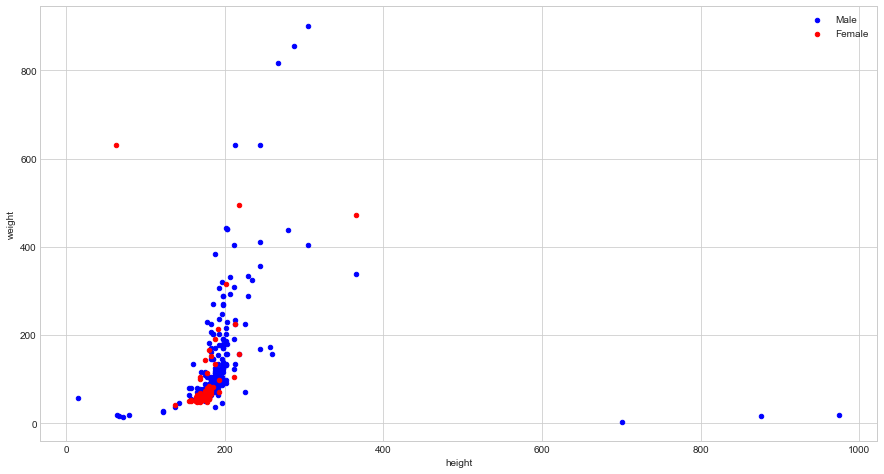

In [141]:
ax = joined_male.plot(kind='scatter',
                      x='height',
                      y='weight',
                      c='blue',
                      label='Male',
                      figsize=(15,8))
joined_female.plot(kind='scatter',
                   x='height',
                   y='weight',
                   c='red',
                   label='Female',
                   ax=ax)

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [142]:
male_heroes_df = joined_heroes[joined_heroes.gender=='Male']
female_heroes_df = joined_heroes[joined_heroes.gender=='Female']

def show_distplot(dataframe, gender=None, column_name=None):
    df = dataframe[(dataframe.gender==gender)
                  &(dataframe[column_name]!=-99)]
    df = df[column_name].dropna()
    ax = sns.distplot(df)
    print(df.describe())
    plt.show()

count    353.000000
mean     191.807365
std       69.259978
min       15.200000
25%      180.000000
50%      185.000000
75%      193.000000
max      975.000000
Name: height, dtype: float64


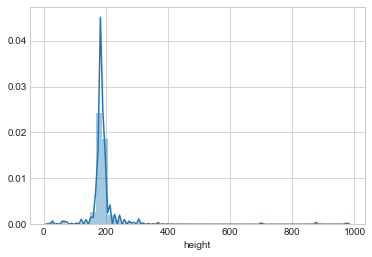

In [143]:
# Male Height
show_distplot(joined_heroes,gender='Male',column_name='height')

count    336.000000
mean     125.125000
std      110.543444
min        2.000000
25%       79.000000
50%       90.000000
75%      122.000000
max      900.000000
Name: weight, dtype: float64


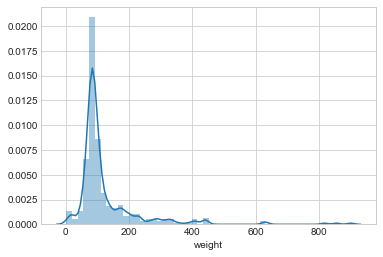

In [144]:
# Male Weight
show_distplot(joined_heroes,gender='Male',column_name='weight')

count    144.000000
mean     174.684028
std       23.697817
min       62.500000
25%      168.000000
50%      170.000000
75%      178.000000
max      366.000000
Name: height, dtype: float64


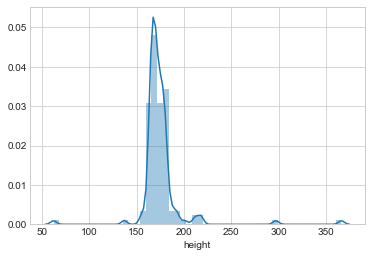

In [145]:
# Female Height
show_distplot(joined_heroes,gender='Female',column_name='height')

count    142.000000
mean      78.838028
std       76.975877
min       41.000000
25%       54.000000
50%       58.000000
75%       65.000000
max      630.000000
Name: weight, dtype: float64


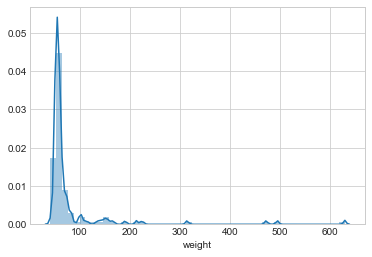

In [146]:
# Female Weight
show_distplot(joined_heroes,gender='Female',column_name='weight')

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________

Both males and females heights and weights are normally distributed with some outliers, mostly on the very high end. Femals tend to be lighter and shorter than the males.

### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [147]:
powers_df.sum().sort_values(ascending=False).head()

super strength    360
stamina           289
durability        257
super speed       249
agility           242
dtype: int64

In [148]:
joined_heroes.publisher.unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [149]:
marvel_names = joined_heroes[joined_heroes['publisher']=='Marvel Comics']
marvel_powers = powers_df[powers_df.index.isin(marvel_names.index)]
marvel_powers.sum().sort_values(ascending=False).head()

super strength    196
durability        145
stamina           143
super speed       131
agility           120
dtype: int64

In [150]:
dc_names = joined_heroes[joined_heroes['publisher']=='DC Comics']
dc_powers = powers_df[powers_df.index.isin(dc_names.index)]
dc_powers.sum().sort_values(ascending=False).head()

super strength    105
stamina            85
flight             83
super speed        77
agility            69
dtype: int64

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________

Super Strength is the most common power in all subsets observed, including the whole dataset. Stamina, super speed, and agility are also commonly among the highest, in slightly different orders. In the DC Universe, flight is one of the most common powers which is not true of the other subset or of the whole dataset.

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [198]:
df2 = joined_heroes[joined_heroes.stamina.notnull()]
df2.head()

,gender,eye color,race,hair color,height,publisher,alignment,weight,height_cat,weight_cat,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,"(180, 270]","(400.0, 450.0]",...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,"(180, 270]","(50.0, 100.0]",...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,"(180, 270]","(50.0, 100.0]",...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,"(180, 270]","(400.0, 450.0]",...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,bad,-99.0,"(-101, -99]","(-100.0, -1.0]",...,False,False,False,False,False,False,False,False,False,False


In [199]:
pd.options.display.max_info_rows = 660
pd.options.display.max_info_columns = 180

In [200]:
df2.iloc[:].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, A-Bomb to Zoom
Data columns (total 177 columns):
gender                          653 non-null object
eye color                       653 non-null object
race                            653 non-null object
hair color                      653 non-null object
height                          653 non-null float64
publisher                       641 non-null object
alignment                       653 non-null object
weight                          651 non-null float64
height_cat                      653 non-null category
weight_cat                      651 non-null category
agility                         653 non-null object
accelerated healing             653 non-null object
lantern power ring              653 non-null object
dimensional awareness           653 non-null object
cold resistance                 653 non-null object
durability                      653 non-null object
stealth                         653 non-null object
ene

In [201]:
#Missed the null values in weight column earlier because I wasn't able to see the counts, fixed
df2 = df2[df2.weight.notnull()]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 651 entries, A-Bomb to Zoom
Data columns (total 177 columns):
gender                          651 non-null object
eye color                       651 non-null object
race                            651 non-null object
hair color                      651 non-null object
height                          651 non-null float64
publisher                       641 non-null object
alignment                       651 non-null object
weight                          651 non-null float64
height_cat                      651 non-null category
weight_cat                      651 non-null category
agility                         651 non-null object
accelerated healing             651 non-null object
lantern power ring              651 non-null object
dimensional awareness           651 non-null object
cold resistance                 651 non-null object
durability                      651 non-null object
stealth                         651 non-null object
ene

In [202]:
#temp = df2.loc[:,'agility':]
#temp2 = df2.loc[df2.gender!='-',:'gender']
#temp = temp.astype(int)
#temp2['male'] = temp2.gender.map(lambda x: True if x == 'Male' else False)
#temp2['female'] = temp2.gender.map(lambda x: True if x == 'Female' else False)
#df2 = temp2.join(temp, how='inner')
#df2.drop(columns='gender',inplace=True)
#df2 = df2.astype(int)
#df2.head()

In [203]:
coocc = df2.T.dot(df2)

SystemError: <class 'weakref'> returned a result with an error set

In [ ]:
np.fill_diagonal(coocc.values,0)
coocc.head()

In [205]:
#We can see here that males and females have the same most common ability
pairs = coocc.idxmax()
pairs

male                     super strength
female                   super strength
agility                         stamina
accelerated healing      super strength
lantern power ring                 male
dimensional awareness              male
cold resistance          super strength
durability               super strength
stealth                         stamina
energy absorption                  male
flight                             male
danger sense                    agility
underwater breathing     super strength
marksmanship                    stamina
weapons master                     male
power augmentation                 male
animal attributes        super strength
longevity                          male
intelligence                       male
super strength                     male
cryokinesis                        male
telepathy                          male
energy armor                       male
energy blasts                      male
duplication                        male


In [211]:
males_df = joined_heroes[(joined_heroes.stamina.notnull())
                        &(joined_heroes.gender=='Male')
                        &(joined_heroes.weight.notnull())]
females_df = joined_heroes[(joined_heroes.stamina.notnull())
                        &(joined_heroes.gender=='Female')
                        &(joined_heroes.weight.notnull())]
males_df = males_df.loc[:,'height_cat':]
females_df = females_df.loc[:,'height_cat':]
print(len(males_df))
males_df.head()

457


,height_cat,weight_cat,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,"(180, 270]","(400.0, 450.0]",False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,"(180, 270]","(50.0, 100.0]",True,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,"(180, 270]","(50.0, 100.0]",False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,"(180, 270]","(400.0, 450.0]",False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,"(-101, -99]","(-100.0, -1.0]",False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [213]:
males_df.height_cat = pd.Categorical(males_df.height_cat)
males_df.weight_cat = pd.Categorical(males_df.weight_cat)
males_df['height class'] = males_df.height_cat.cat.codes
males_df['weight class'] = males_df.weight_cat.cat.codes
males_df.head()

,height_cat,weight_cat,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,...,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient,height class,weight class
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,"(180, 270]","(400.0, 450.0]",False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,3,8
Abe Sapien,"(180, 270]","(50.0, 100.0]",True,True,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,3,2
Abin Sur,"(180, 270]","(50.0, 100.0]",False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,2
Abomination,"(180, 270]","(400.0, 450.0]",False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,8
Abraxas,"(-101, -99]","(-100.0, -1.0]",False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0,0


In [214]:
males_df = males_df.loc[:,'agility':].astype(int)
males_df.head()

,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,danger sense,...,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient,height class,weight class
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,8
Abe Sapien,1,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2
Abin Sur,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,2
Abomination,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,8
Abraxas,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
females_df['height class'] = females_df.height_cat.cat.codes
females_df['weight class'] = females_df.weight_cat.cat.codes
females_df = females_df.loc[:,'agility':].astype(int)
females_df.head()

,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,danger sense,...,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient,height class,weight class
name,,,,,,,,,,,,,,,,,,,,,
Angel Dust,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
Angel Salvadore,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,2
Angela,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arachne,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
Arclight,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


In [219]:
males_df = males_df.loc[:,:'omniscient']
males_coocc = males_df.T.dot(males_df)
np.fill_diagonal(males_coocc.values,0)
males_coocc.head()

,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,danger sense,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
agility,0,78,4,7,23,88,67,21,56,19,...,7,6,2,7,1,0,0,1,0,0
accelerated healing,78,0,2,10,20,78,32,28,57,16,...,8,7,2,7,1,0,1,1,0,0
lantern power ring,4,2,0,0,0,4,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
dimensional awareness,7,10,0,0,0,5,4,5,13,0,...,0,6,0,0,0,0,0,0,0,0
cold resistance,23,20,0,0,0,33,10,6,7,2,...,0,1,0,1,0,0,0,0,0,0


In [221]:
males_pairs = males_coocc.idxmax()
males_pairs.head()

agility                         stamina
accelerated healing      super strength
lantern power ring               flight
dimensional awareness     teleportation
cold resistance          super strength
dtype: object

In [223]:
females_df = females_df.loc[:,:'omniscient']
females_coocc = females_df.T.dot(females_df)
np.fill_diagonal(females_coocc.values,0)
females_coocc.head()

,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,danger sense,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
agility,0,23,1,1,4,26,27,9,18,8,...,4,1,0,0,0,1,0,0,0,0
accelerated healing,23,0,0,0,5,26,12,5,17,6,...,4,0,0,0,0,0,0,0,0,0
lantern power ring,1,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
dimensional awareness,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
cold resistance,4,5,0,0,0,9,3,3,5,1,...,0,0,0,0,0,0,0,0,0,0


([<matplotlib.axis.XTick at 0x23286b97ac8>,
 <a list of 167 Text xticklabel objects>)

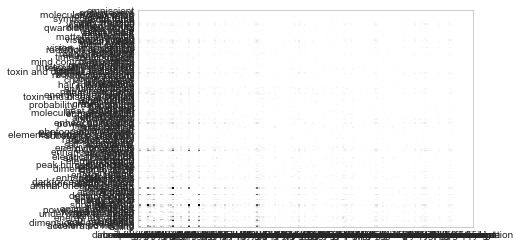

In [226]:
plt.pcolor(females_coocc)
plt.yticks(np.arange(0.5, len(females_coocc.index), 1), females_coocc.index)
plt.xticks(np.arange(0.5, len(females_coocc.columns), 1), females_coocc.columns)

In [236]:
#It seems that there are too many heroes in the gender subsets to look at at once...
#Going to divide them into weight subsets
males = df2[df2.gender=='Male']
males = males.loc[:,'weight_cat':].sort_values('weight_cat')
print(males.weight_cat.unique())
males.head()

[(-100.0, -1.0], (-1.0, 50.0], (50.0, 100.0], (100.0, 150.0], (150.0, 200.0], ..., (250.0, 350.0], (350.0, 400.0], (400.0, 450.0], (500.0, 750.0], (750.0, 1000.0]]
Length: 11
Categories (11, interval[float64]): [(-100.0, -1.0] < (-1.0, 50.0] < (50.0, 100.0] < (100.0, 150.0] ... (350.0, 400.0] < (400.0, 450.0] < (500.0, 750.0] < (750.0, 1000.0]]


,weight_cat,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
name,,,,,,,,,,,,,,,,,,,,,
Jean-Luc Picard,"(-100.0, -1.0]",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Curse,"(-100.0, -1.0]",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cy-Gor,"(-100.0, -1.0]",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Quantum,"(-100.0, -1.0]",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Cyborg Superman,"(-100.0, -1.0]",False,False,False,False,False,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [242]:
males.sort_values('weight_class',ascending=False).head()

,weight_cat,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,...,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient,weight_class
name,,,,,,,,,,,,,,,,,,,,,
Juggernaut,"(750.0, 1000.0]",False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,11
Darkseid,"(750.0, 1000.0]",True,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,11
Sasquatch,"(750.0, 1000.0]",True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,11
Hulk,"(500.0, 750.0]",True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,10
Red Hulk,"(500.0, 750.0]",False,True,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,10


In [249]:
males['weight_class'] = males.weight_cat.cat.codes
for i in males.weight_class.unique():
    globals()['males%s' % i] = males[males.weight_class==i].drop(columns=['weight_cat','weight_class']).astype(int)
males0.head()

,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,danger sense,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
name,,,,,,,,,,,,,,,,,,,,,
Jean-Luc Picard,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Curse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cy-Gor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Quantum,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cyborg Superman,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
for i in males.weight_class.unique():
    globals()[f'males{i}_coocc'] = globals()[f'males{i}'].T.dot(globals()[f'males{i}'])
    np.fill_diagonal(globals()[f'males{i}_coocc'].values,0)
males0_coocc.head()

,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,danger sense,...,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
agility,0,17,1,2,3,12,16,5,12,3,...,0,3,0,1,0,0,0,0,0,0
accelerated healing,17,0,1,4,2,12,9,9,15,2,...,0,5,0,1,0,0,1,0,0,0
lantern power ring,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
dimensional awareness,2,4,0,0,0,1,2,3,6,0,...,0,4,0,0,0,0,0,0,0,0
cold resistance,3,2,0,0,0,4,1,0,2,0,...,0,0,0,1,0,0,0,0,0,0


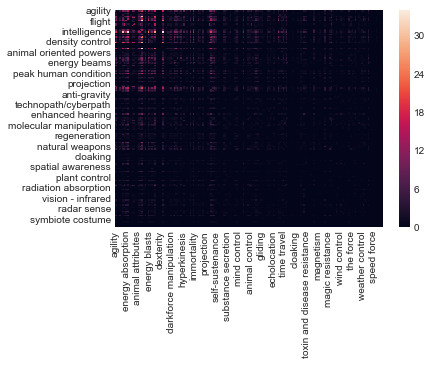

In [256]:
sns.heatmap(males0_coocc)

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data